In [1]:
!ls /content/

data.zip  sample_data


In [2]:
!unzip /content/data.zip -d /content/extracted_folder/

Archive:  /content/data.zip
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/01_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/02_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/03_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/04_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/05_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/06_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/07_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/08_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/09_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/10_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/11_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/12_049.png  
  inflating: /content/ex

In [3]:
!ls /content/extracted_folder/sign_data/Dataset/train

001	  012_forg  019       025_forg	032	  038_forg  045       051_forg	058	  064_forg
001_forg  013	    019_forg  026	032_forg  039	    045_forg  052	058_forg  065
002	  013_forg  020       026_forg	033	  039_forg  046       052_forg	059	  065_forg
002_forg  014	    020_forg  027	033_forg  040	    046_forg  053	059_forg  066
003	  014_forg  021       027_forg	034	  040_forg  047       053_forg	060	  066_forg
003_forg  015	    021_forg  028	034_forg  041	    047_forg  054	060_forg  067
004	  015_forg  022       028_forg	035	  041_forg  048       054_forg	061	  067_forg
004_forg  016	    022_forg  029	035_forg  042	    048_forg  055	061_forg  068
006	  016_forg  023       029_forg	036	  042_forg  049       055_forg	062	  068_forg
006_forg  017	    023_forg  030	036_forg  043	    049_forg  056	062_forg  069
009	  017_forg  024       030_forg	037	  043_forg  050       056_forg	063	  069_forg
009_forg  018	    024_forg  031	037_forg  044	    050_forg  057	063_forg
012	  018_forg  025       0

In [4]:
!cp /content/extracted_folder/sign_data/Dataset/train/{001..069}_forg/* /content/biinary/fake/

cp: cannot stat '/content/extracted_folder/sign_data/Dataset/train/005_forg/*': No such file or directory
cp: cannot stat '/content/extracted_folder/sign_data/Dataset/train/007_forg/*': No such file or directory
cp: cannot stat '/content/extracted_folder/sign_data/Dataset/train/008_forg/*': No such file or directory
cp: cannot stat '/content/extracted_folder/sign_data/Dataset/train/010_forg/*': No such file or directory
cp: cannot stat '/content/extracted_folder/sign_data/Dataset/train/011_forg/*': No such file or directory


In [5]:
!cp /content/extracted_folder/sign_data/Dataset/train/{001..069}/* /content/biinary/real/

cp: cannot stat '/content/extracted_folder/sign_data/Dataset/train/005/*': No such file or directory
cp: cannot stat '/content/extracted_folder/sign_data/Dataset/train/007/*': No such file or directory
cp: cannot stat '/content/extracted_folder/sign_data/Dataset/train/008/*': No such file or directory
cp: cannot stat '/content/extracted_folder/sign_data/Dataset/train/010/*': No such file or directory
cp: cannot stat '/content/extracted_folder/sign_data/Dataset/train/011/*': No such file or directory


In [9]:
!ls /content/biinary/real | wc -l

887


In [10]:
!ls /content/biinary/fake | wc -l

762


In [6]:
!find /content/biinary/real -type f -iname "*.PNG" -exec rename 's/\.PNG$/.png/' {} \;


In [12]:
!find /content/biinary/fake -type f -iname "*.PNG" -exec rename 's/\.PNG$/.png/' {} \;


In [13]:
rm -rf /content/biinary/fake/ipynb_checkpoints

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import os


In [15]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

class SignatureDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.data = []

        # Iterate over real and fake folders
        for label, class_name in enumerate(["real", "fake"]):
            class_dir = os.path.join(root_dir, class_name)
            if not os.path.exists(class_dir):
                print(f"Warning: {class_dir} not found.")
                continue
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                if img_path.lower().endswith(('png', 'jpg', 'jpeg')):
                    self.data.append((img_path, label))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(label, dtype=torch.long)


In [16]:
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


In [17]:
train_dir = '/content/biinary/'
train_dataset = SignatureDataset(root_dir=train_dir, transform=data_transforms)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

print(f"Total images: {len(train_dataset)}")
print("Example batch:")
images, labels = next(iter(train_loader))
print(f"Images shape: {images.shape}, Labels shape: {labels.shape}")


Total images: 1649
Example batch:
Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])


In [18]:
class_names = ['Fake', 'Real']
print(f"Class Names: {class_names}")


Class Names: ['Fake', 'Real']


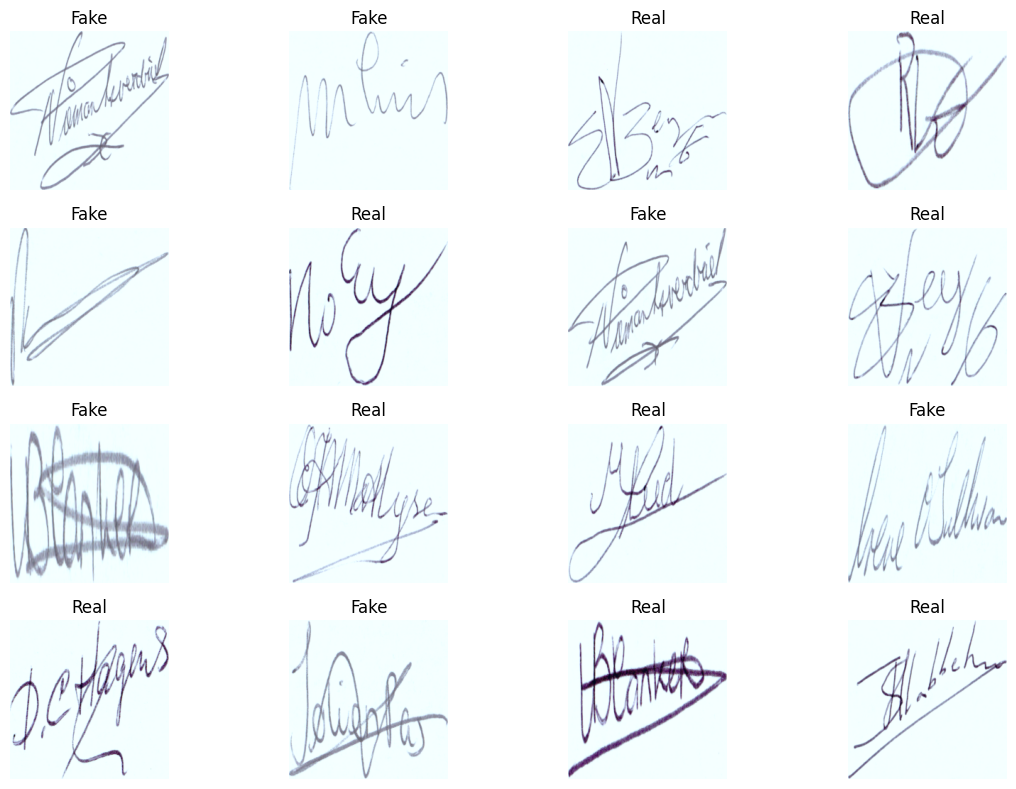

In [19]:
import matplotlib.pyplot as plt

def show_images(images, labels, class_names=['Fake', 'Real']):
    plt.figure(figsize=(12, 8))
    for i in range(min(16, len(images))):  # Show up to 16 images
        plt.subplot(4, 4, i+1)
        img = images[i].permute(1, 2, 0).numpy()  # Convert to (H, W, C)
        img = img * 0.229 + 0.485  # Denormalize using mean and std
        img = img.clip(0, 1)  # Clip to valid range

        label = class_names[labels[i].item()]
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize first batch
images, labels = next(iter(train_loader))
show_images(images, labels)


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Device Configuration (Ensure GPU is used if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data Paths
train_dir = '/content/biinary/'

# Data Transformations
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = SignatureDataset(root_dir=train_dir, transform=data_transforms)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


# Load Pretrained ResNet18
model = models.resnet18(pretrained=True)

# Freeze all layers except the last layer
for param in model.parameters():
    param.requires_grad = False

# Replace the final layer with a Sigmoid for binary classification
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features, 1),
    nn.Sigmoid()  # Output single value between 0 and 1
)

model = model.to(device)

# Loss and Optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Training Loop
def train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            labels = labels.float().unsqueeze(1)  # Convert labels to float for BCE Loss

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Calculate predictions (using 0.5 threshold for sigmoid)
            predictions = (outputs > 0.5).float()
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
            running_loss += loss.item()

        scheduler.step()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

        # Save Model Checkpoint
        checkpoint_path = f'checkpoints/resnet18_epoch_{epoch+1}.pth'
        torch.save({
            'epoch': epoch+1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': epoch_loss,
            'accuracy': epoch_acc
        }, checkpoint_path)
        print(f"Model saved at {checkpoint_path}")

    print("Training completed.")
    return model


trained_model = train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=10)


Using device: cuda
Epoch [1/10], Loss: 0.4597, Accuracy: 84.17%
Model saved at checkpoints/resnet18_epoch_1.pth
Epoch [2/10], Loss: 0.2927, Accuracy: 90.66%
Model saved at checkpoints/resnet18_epoch_2.pth
Epoch [3/10], Loss: 0.2450, Accuracy: 92.60%
Model saved at checkpoints/resnet18_epoch_3.pth
Epoch [4/10], Loss: 0.2047, Accuracy: 93.03%
Model saved at checkpoints/resnet18_epoch_4.pth
Epoch [5/10], Loss: 0.1996, Accuracy: 93.21%
Model saved at checkpoints/resnet18_epoch_5.pth
Epoch [6/10], Loss: 0.1748, Accuracy: 93.81%
Model saved at checkpoints/resnet18_epoch_6.pth
Epoch [7/10], Loss: 0.1885, Accuracy: 93.09%
Model saved at checkpoints/resnet18_epoch_7.pth
Epoch [8/10], Loss: 0.1544, Accuracy: 94.85%
Model saved at checkpoints/resnet18_epoch_8.pth
Epoch [9/10], Loss: 0.1631, Accuracy: 94.66%
Model saved at checkpoints/resnet18_epoch_9.pth
Epoch [10/10], Loss: 0.1584, Accuracy: 95.03%
Model saved at checkpoints/resnet18_epoch_10.pth
Training completed.


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import os

# Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data Paths
train_dir = '/content/biinary/'

# Data Augmentation for Training Set
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Only Resize and Normalize for Validation Set (No Augmentation)
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load Dataset
full_dataset = SignatureDataset(root_dir=train_dir, transform=None)

# Split into Train and Validation Sets (80% Train, 20% Validation)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_dataset.dataset.transform = train_transforms
val_dataset.dataset.transform = val_transforms

print(f"Train Size: {len(train_dataset)}, Validation Size: {len(val_dataset)}")

Using device: cuda
Train Size: 1319, Validation Size: 330


In [ ]:
!rm -rf /content/checkpoints

In [23]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load Pretrained ResNet18
model = models.resnet18(pretrained=True)

# Freeze all layers except the last layer
for param in model.parameters():
    param.requires_grad = False

# Replace the final layer with a Sigmoid for binary classification
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features, 1),
    nn.Sigmoid()
)

model = model.to(device)

# Loss and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Training and Validation Loop
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=10):
    os.makedirs('checkpoints_new', exist_ok=True)

    for epoch in range(num_epochs):
        # Training Phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            labels = labels.float().unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            predictions = (outputs > 0.5).float()
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total

        # Validation Phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                labels = labels.float().unsqueeze(1)

                outputs = model(images)
                loss = criterion(outputs, labels)

                predictions = (outputs > 0.5).float()
                val_correct += (predictions == labels).sum().item()
                val_total += labels.size(0)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        val_acc = 100 * val_correct / val_total

        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%")
        print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%")

        # Save Model Checkpoint
        checkpoint_path = f'checkpoints_new/resnet18_epoch_{epoch+1}.pth'
        torch.save({
            'epoch': epoch+1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_loss': train_loss,
            'train_accuracy': train_acc,
            'val_loss': val_loss,
            'val_accuracy': val_acc
        }, checkpoint_path)
        print(f"Model saved at {checkpoint_path}\n")

        scheduler.step()

    print("Training completed.")
    return model

# Start Training
trained_model = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=10)


Epoch [1/10]
Train Loss: 0.5187, Train Accuracy: 76.35%
Val Loss: 0.4015, Val Accuracy: 86.06%
Model saved at checkpoints_new/resnet18_epoch_1.pth

Epoch [2/10]
Train Loss: 0.3356, Train Accuracy: 89.31%
Val Loss: 0.2842, Val Accuracy: 90.61%
Model saved at checkpoints_new/resnet18_epoch_2.pth

Epoch [3/10]
Train Loss: 0.2785, Train Accuracy: 90.07%
Val Loss: 0.2439, Val Accuracy: 91.82%
Model saved at checkpoints_new/resnet18_epoch_3.pth

Epoch [4/10]
Train Loss: 0.2420, Train Accuracy: 92.27%
Val Loss: 0.2134, Val Accuracy: 94.24%
Model saved at checkpoints_new/resnet18_epoch_4.pth

Epoch [5/10]
Train Loss: 0.2198, Train Accuracy: 92.80%
Val Loss: 0.2346, Val Accuracy: 90.91%
Model saved at checkpoints_new/resnet18_epoch_5.pth

Epoch [6/10]
Train Loss: 0.2257, Train Accuracy: 90.83%
Val Loss: 0.1835, Val Accuracy: 95.15%
Model saved at checkpoints_new/resnet18_epoch_6.pth

Epoch [7/10]
Train Loss: 0.1919, Train Accuracy: 94.24%
Val Loss: 0.1718, Val Accuracy: 95.45%
Model saved at ch

In [24]:
!ls /content/extracted_folder/sign_data/Dataset/test

049	  051_forg  054       056_forg	059	  061_forg  064       066_forg	069
049_forg  052	    054_forg  057	059_forg  062	    064_forg  067	069_forg
050	  052_forg  055       057_forg	060	  062_forg  065       067_forg
050_forg  053	    055_forg  058	060_forg  063	    065_forg  068
051	  053_forg  056       058_forg	061	  063_forg  066       068_forg


In [30]:
!cp /content/extracted_folder/sign_data/Dataset/test/{049..069}_forg/* /content/test/fake

In [31]:
!ls /content/test/fake

01_0101066.PNG	01_0202053.PNG	02_0115053.PNG	03_0102061.PNG	03_0203064.PNG	04_0116062.PNG
01_0102054.PNG	01_0202055.PNG	02_0115056.PNG	03_0104051.PNG	03_0204050.PNG	04_0117057.PNG
01_0102061.PNG	01_0203064.PNG	02_0116062.PNG	03_0104059.PNG	03_0205067.PNG	04_0118055.PNG
01_0104051.PNG	01_0204050.PNG	02_0117057.PNG	03_0104063.PNG	03_0206049.PNG	04_0118065.PNG
01_0104059.PNG	01_0205067.PNG	02_0118055.PNG	03_0105056.PNG	03_0206061.PNG	04_0119063.PNG
01_0104063.PNG	01_0206049.PNG	02_0118065.PNG	03_0105064.PNG	03_0206065.PNG	04_0120051.PNG
01_0105056.PNG	01_0206061.PNG	02_0119063.PNG	03_0106052.PNG	03_0207052.PNG	04_0120055.PNG
01_0105064.PNG	01_0206065.PNG	02_0120051.PNG	03_0106069.PNG	03_0207053.PNG	04_0121060.PNG
01_0106052.PNG	01_0207052.PNG	02_0120055.PNG	03_0107053.PNG	03_0207054.PNG	04_0124054.PNG
01_0106069.PNG	01_0207053.PNG	02_0121060.PNG	03_0108063.PNG	03_0208054.PNG	04_0124068.PNG
01_0107053.PNG	01_0207054.PNG	02_0124054.PNG	03_0108069.PNG	03_0208057.PNG	04_0125050.PNG
01_0108063

In [32]:
!ls /content/extracted_folder/sign_data/Dataset/test

049	  051_forg  054       056_forg	059	  061_forg  064       066_forg	069
049_forg  052	    054_forg  057	059_forg  062	    064_forg  067	069_forg
050	  052_forg  055       057_forg	060	  062_forg  065       067_forg
050_forg  053	    055_forg  058	060_forg  063	    065_forg  068
051	  053_forg  056       058_forg	061	  063_forg  066       068_forg


In [33]:
!cp /content/extracted_folder/sign_data/Dataset/test/{049..069}/* /content/test/real

In [34]:
!ls /content/test/fake/

01_0101066.PNG	01_0202053.PNG	02_0115053.PNG	03_0102061.PNG	03_0203064.PNG	04_0116062.PNG
01_0102054.PNG	01_0202055.PNG	02_0115056.PNG	03_0104051.PNG	03_0204050.PNG	04_0117057.PNG
01_0102061.PNG	01_0203064.PNG	02_0116062.PNG	03_0104059.PNG	03_0205067.PNG	04_0118055.PNG
01_0104051.PNG	01_0204050.PNG	02_0117057.PNG	03_0104063.PNG	03_0206049.PNG	04_0118065.PNG
01_0104059.PNG	01_0205067.PNG	02_0118055.PNG	03_0105056.PNG	03_0206061.PNG	04_0119063.PNG
01_0104063.PNG	01_0206049.PNG	02_0118065.PNG	03_0105064.PNG	03_0206065.PNG	04_0120051.PNG
01_0105056.PNG	01_0206061.PNG	02_0119063.PNG	03_0106052.PNG	03_0207052.PNG	04_0120055.PNG
01_0105064.PNG	01_0206065.PNG	02_0120051.PNG	03_0106069.PNG	03_0207053.PNG	04_0121060.PNG
01_0106052.PNG	01_0207052.PNG	02_0120055.PNG	03_0107053.PNG	03_0207054.PNG	04_0124054.PNG
01_0106069.PNG	01_0207053.PNG	02_0121060.PNG	03_0108063.PNG	03_0208054.PNG	04_0124068.PNG
01_0107053.PNG	01_0207054.PNG	02_0124054.PNG	03_0108069.PNG	03_0208057.PNG	04_0125050.PNG
01_0108063

In [35]:
!ls /content/test/real | wc -l

252


In [36]:
!ls /content/test/fake | wc -l

248


In [37]:
!find /content/test/real -type f -iname "*.PNG" -exec rename 's/\.PNG$/.png/' {} \;

In [38]:
!find /content/test/fake -type f -iname "*.PNG" -exec rename 's/\.PNG$/.png/' {} \;

In [39]:
# Path to Test Data
test_dir = '/content/test/'

# Data Transformations for Test (No Augmentation, Only Resize and Normalize)
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load Test Dataset using SignatureDataset
test_dataset = SignatureDataset(root_dir=test_dir, transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Test Size: {len(test_dataset)}")

Test Size: 500


In [41]:
import torch
import torch.nn as nn
from torchvision import models

# Load the Model
model = models.resnet18()
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features, 1),
    nn.Sigmoid()
)

# Load the Checkpoint
checkpoint_path = '/content/checkpoints_new/resnet18_epoch_10.pth'
checkpoint = torch.load(checkpoint_path, map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
model.load_state_dict(checkpoint['model_state_dict'])
model.to('cuda' if torch.cuda.is_available() else 'cpu')
model.eval()
print("Model loaded successfully.")


Model loaded successfully.


In [42]:
def evaluate_model(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    correct = 0
    total = 0
    criterion = nn.BCELoss()

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.float().unsqueeze(1).to(device)

            outputs = model(images)
            predictions = (outputs > 0.5).float()

            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Evaluate
evaluate_model(model, test_loader)


Test Accuracy: 97.40%
